In [1]:
c
import scipy.stats as stats

In [2]:
df = pd.read_csv('dataset/questionnaire_sample.csv')

In [3]:
df.head()

,No,gender,age,job,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SA9,SA10
0,46,M,48,A,4,6,8,7,8,5,3,7,3,7
1,98,M,43,A,5,5,6,9,7,10,8,5,4,10
2,20,M,55,B,8,8,6,3,8,4,7,6,7,8
3,55,M,54,B,3,4,5,8,6,2,6,2,8,5
4,96,M,53,B,7,10,8,10,2,1,5,2,8,7


In [5]:
df.tail()

,No,gender,age,job,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SA9,SA10
95,54,F,29,E,3,3,8,2,4,4,5,3,4,6
96,16,F,28,E,3,3,4,1,4,2,6,9,3,1
97,73,F,27,E,2,5,3,2,7,4,1,3,10,8
98,41,F,26,E,9,9,3,5,2,8,6,2,7,2
99,58,F,21,E,3,8,9,10,5,5,3,2,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      100 non-null    int64 
 1   gender  100 non-null    object
 2   age     100 non-null    int64 
 3   job     100 non-null    object
 4   SA1     100 non-null    int64 
 5   SA2     100 non-null    int64 
 6   SA3     100 non-null    int64 
 7   SA4     100 non-null    int64 
 8   SA5     100 non-null    int64 
 9   SA6     100 non-null    int64 
 10  SA7     100 non-null    int64 
 11  SA8     100 non-null    int64 
 12  SA9     100 non-null    int64 
 13  SA10    100 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 11.1+ KB


In [7]:
df.describe(include='all')

,No,gender,age,job,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SA9,SA10
count,100.000000,100,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
unique,NaN,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,54,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50.500000,NaN,39.650000,NaN,4.250000,6.620000,5.500000,5.800000,5.500000,5.570000,5.420000,5.140000,5.48000,6.120000
std,29.011492,NaN,11.469217,NaN,2.226448,2.673401,2.418364,3.061656,2.826641,2.982288,2.875111,2.810586,2.89716,2.885981
min,1.000000,NaN,20.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,25.750000,NaN,29.000000,NaN,3.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000
50%,50.500000,NaN,41.000000,NaN,4.000000,7.000000,5.500000,6.000000,6.000000,6.000000,6.000000,5.000000,5.50000,7.000000
75%,75.250000,NaN,50.000000,NaN,6.000000,9.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.00000,9.000000


(array([ 8., 11., 11.,  9.,  7., 13., 11., 10., 13.,  7.]),
 array([20. , 23.9, 27.8, 31.7, 35.6, 39.5, 43.4, 47.3, 51.2, 55.1, 59. ]),
 <BarContainer object of 10 artists>)

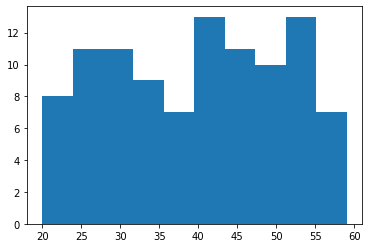

In [17]:
plt.hist(df['age'], bins=10)

<AxesSubplot:ylabel='Frequency'>

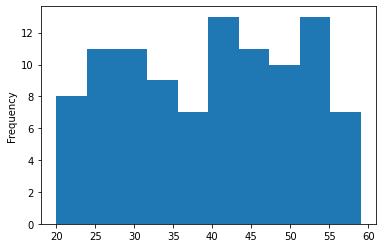

In [41]:
# from OREILLY 
df['age'].plot.hist(bins=10)

In [37]:
df.groupby('gender').count()['No']

gender
F    54
M    46
Name: No, dtype: int64

In [35]:
from numpy import std, mean, sqrt

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return abs(mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [42]:
def my_report(xa,xb):
    repo = []
    t, p = stats.ttest_ind(xa, xb, equal_var=False)
    MU = xa.mean()-xb.mean()
    Cd = cohen_d(xa,xb)
    repo.append(round(xa.mean(),3))
    repo.append(round(xb.mean(),3))
    repo.append(round(MU,3))
    repo.append(round(p,3))
    str1 = ''
    str2 = ''
 
# pval evalustion：p値の評価
    
    if p < 0.001:
        str1 = '***'
    elif p < 0.01:
        str1 = '**'
    elif p < 0.05:
        str1 = '*'
    elif p < 0.1:
        str1 = '†'
 
# cohen d evalustion：効果量の評価
 
    if Cd > 0.8:
        str2 = 'Large'
    elif Cd > 0.5:
        str2 = 'Medium'
    elif Cd > 0.2:
        str2 = 'Small'
    else:
        str2 = 'Very Small'
 
    repo.append(str1)
    repo.append(round(Cd,3))
    repo.append(str2)
    
    return(repo)

In [43]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [46]:
u = df['gender'].nunique()
u

2

In [44]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [55]:
df

,No,gender,age,job,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SA9,SA10
0,46,0,48,A,4,6,8,7,8,5,3,7,3,7
1,98,0,43,A,5,5,6,9,7,10,8,5,4,10
2,20,0,55,B,8,8,6,3,8,4,7,6,7,8
3,55,0,54,B,3,4,5,8,6,2,6,2,8,5
4,96,0,53,B,7,10,8,10,2,1,5,2,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,1,29,E,3,3,8,2,4,4,5,3,4,6
96,16,1,28,E,3,3,4,1,4,2,6,9,3,1
97,73,1,27,E,2,5,3,2,7,4,1,3,10,8
98,41,1,26,E,9,9,3,5,2,8,6,2,7,2


In [54]:
# レポートの形式を定義します

[pre_list for j in range(0,u)]

df_repo = pd.DataFrame(columns=['ave','ave_other','ave_diff','pval','s/ns','d','d_eval'],index = pre_list)
 
# 形を確認しておきましょう
df_repo

,ave,ave_other,ave_diff,pval,s/ns,d,d_eval
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
for j in range(0,u):
    Col1 = df['gender'].name
    Col2 = df['SA1'].name 
    xa = df[df[Col1]==j][Col2]
    xb = df[df[Col1]!=j][Col2]
    df_repo.iloc[j,:] = my_report(xa,xb)
df_repo

,ave,ave_other,ave_diff,pval,s/ns,d,d_eval
0,4.043,4.426,-0.382,0.388,,0.172,Very Small
1,4.426,4.043,0.382,0.388,,0.172,Very Small


In [49]:
for i in range(4,len(df.columns)):   
    df_repo = []
    df_repo = pd.DataFrame(columns=['ave','ave_other','ave_diff','pval','s/ns','d','d_eval'],index = pre_list)
    for j in range(0,u):
        Col1 = df['gender'].name
        Col2 = df.iloc[:,i].name 
        xa = df[df[Col1]==j][Col2]
        xb = df[df[Col1]!=j][Col2]
        df_repo.iloc[j,:] = my_report(xa,xb)
    print("----------------------------------------------------------------------","\n")
    print(df['gender'].name,"による",df.iloc[:,i].name,"の層別結果","\n",df_repo,"\n")

---------------------------------------------------------------------- 

gender による SA1 の層別結果 
      ave ave_other ave_diff   pval s/ns      d      d_eval
0  4.043     4.426   -0.382  0.388       0.172  Very Small
1  4.426     4.043    0.382  0.388       0.172  Very Small 

---------------------------------------------------------------------- 

gender による SA2 の層別結果 
      ave ave_other ave_diff  pval s/ns      d d_eval
0  6.913      6.37    0.543  0.32       0.203  Small
1   6.37     6.913   -0.543  0.32       0.203  Small 

---------------------------------------------------------------------- 

gender による SA3 の層別結果 
      ave ave_other ave_diff   pval s/ns      d  d_eval
0  4.717     6.167   -1.449  0.002   **  0.625  Medium
1  6.167     4.717    1.449  0.002   **  0.625  Medium 

---------------------------------------------------------------------- 

gender による SA4 の層別結果 
      ave ave_other ave_diff   pval s/ns      d d_eval
0  6.174     5.481    0.692  0.262       0.226  Small
1